### Imports and global settings

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
import copy

random.seed(123456)
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

# Data manipulation

## Loading the data

In [ ]:
file = open('/content/drive/MyDrive/Programowanie/Uczenie_maszynowe/Telephones.csv')
csvreader = csv.reader(file)
headers1 = next(csvreader)
headers = headers1[:-1]
category = headers1[-1]
data = []
for row in csvreader:
  data.append([float(value) for value in row])
data = np.array(data)
classes = np.unique(data[:,-1])

 Printing the data

In [ ]:
print(f'headers: {headers}')
print(f'category: {category}')
print(f'clases: {classes}')
print(f'data: {data}')

headers: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
category: price_range
clases: [0. 1. 2. 3.]
data: [[ 842.     0.     2.2 ...    0.     1.     1. ]
 [1021.     1.     0.5 ...    1.     0.     2. ]
 [ 563.     1.     0.5 ...    1.     0.     2. ]
 ...
 [1911.     0.     0.9 ...    1.     0.     3. ]
 [1512.     0.     0.9 ...    1.     1.     0. ]
 [ 510.     1.     2.  ...    1.     1.     3. ]]


## Analising the data

In [ ]:
for i in range(len(headers)):
  att_v = np.unique(data[:, i])
  print(f'-------------------------------- attribute: {headers[i]} --------------------------------')
  print(f'available values: {len(att_v)}')
  print(att_v)

-------------------------------- attribute: battery_power --------------------------------
available values: 1094
[ 501.  502.  503. ... 1996. 1997. 1998.]
-------------------------------- attribute: blue --------------------------------
available values: 2
[0. 1.]
-------------------------------- attribute: clock_speed --------------------------------
available values: 26
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
-------------------------------- attribute: dual_sim --------------------------------
available values: 2
[0. 1.]
-------------------------------- attribute: fc --------------------------------
available values: 20
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
-------------------------------- attribute: four_g --------------------------------
available values: 2
[0. 1.]
-------------------------------- attribute: int_memory --------------------------------
available values: 6

Listing the dubious attributes with many values, to ckech what is the distribution of values in ech class.

In [ ]:
# dubious attributes
dub = ['battery_power', 'px_height', 'px_width', 'ram']
dub_ind = []
for attr in dub:
  dub_ind.append(headers.index(attr))
print(dub_ind)

[0, 11, 12, 13]


In [ ]:
# each class has its own elements list (usefull for further analysis)
segreg = [[] for clas in classes]
for row in data:
  for clas in classes:
    if row[-1] == clas:
      segreg[int(clas)].append(row)
segreg = np.array(segreg)

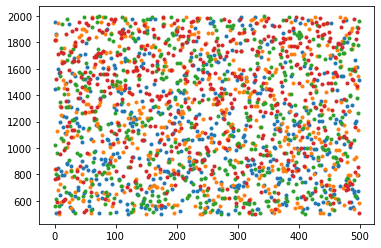

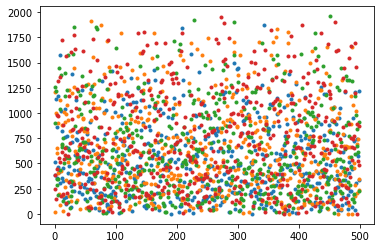

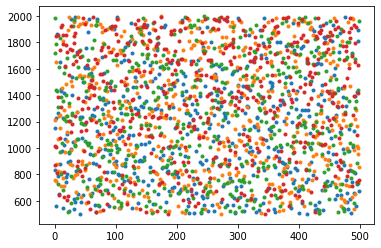

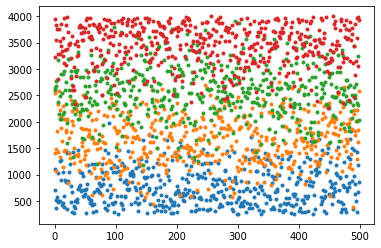

In [ ]:
for attr in dub_ind:
  for clas in classes:
    plt.plot([i for i in range(len(segreg[int(clas)]))], segreg[int(clas)][:, attr], '.')
  plt.show()

We can clearly see that attribute 'ram' distinguish between phone classes.
As for the other dubious attributes that isn't so clear.

In [ ]:
colors = ['blue', 'orange', 'green', 'red']
bins = 30

### Attribute 'battery_power'

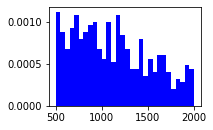

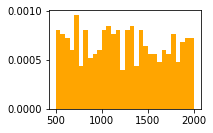

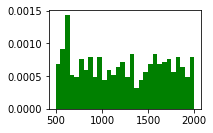

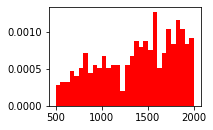

In [ ]:
i = 0
for clas in classes:
  plt.subplot(2, 2, i + 1)
  plt.hist(segreg[int(clas)][:, dub_ind[0]], density = True, bins = bins, color=colors[i], range = [500, 2000])
  plt.show()
  i += 1

### Attribute 'px_height'

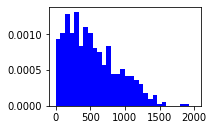

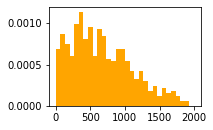

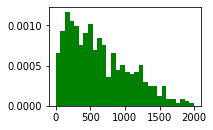

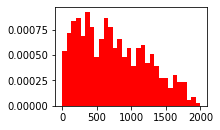

In [ ]:
i = 0
for clas in classes:
  plt.subplot(2, 2, i + 1)
  plt.hist(segreg[int(clas)][:, dub_ind[1]], density = True, bins = bins, color=colors[i], range = [0, 2000])
  plt.show()
  i += 1

### Attribute 'px_width'

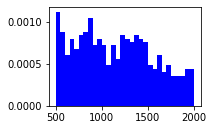

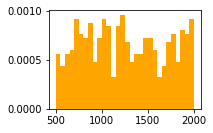

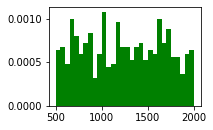

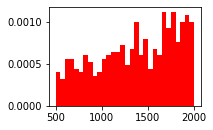

In [ ]:
i = 0
for clas in classes:
  plt.subplot(2, 2, i + 1)
  plt.hist(segreg[int(clas)][:, dub_ind[2]], density = True, bins = bins, color=colors[i], range = [500, 2000])
  plt.show()
  i += 1

### Attribute 'ram'

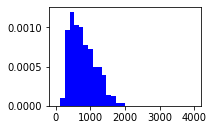

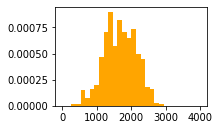

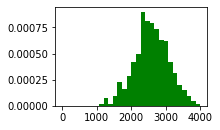

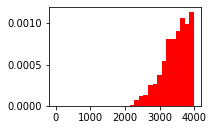

In [ ]:
i = 0
for clas in classes:
  plt.subplot(2, 2, i + 1)
  plt.hist(segreg[int(clas)][:, dub_ind[3]], density = True, bins = bins, color=colors[i], range = [0, 4000])
  plt.show()
  i += 1

### Dividing the dataset

We divide the dataset into training dataset, on which the model will be taught, and training set, on which the efectiveness of already build model will be tested.
All classes have 500 samples exactly, so we will take random samples of 100 from each group.
This will result in division between training and testing sets of ratio 8:2.

In [ ]:
amount = int(0.2 * len(data))
ind_test_set = random.sample(range(len(data)), amount)
data_test = []
data_training = []
for i in range(len(data)):
  if i in ind_test_set:
    data_test.append(data[i])
  else:
    data_training.append(data[i])
data_test = np.array(data_test)
data_training = np.array(data_training)

# Tree

## Creating classes

### Node

In [ ]:
class Node:
  def __init__(self, index, tree, data, headers, category, class_list, class_number, sizes, depth, parent = None):
    self.index = f'node_{index}'
    self.parent = parent
    self.tree = tree
    self.attr = None
    self.tresh = 0
    self.data = data
    self.n_data = len(data)
    self.headers = headers
    self.category = category
    self.classes = class_list
    self.n_classes = class_number
    self.n_head = len(headers)
    self.sizes = sizes
    self.leaf = False
    self.depth = depth
    self.info = 0
    # create list of available split values for each attribute
    ranges = []
    for i in range(self.n_head):
      ranges.append(np.unique(data[:, i]))
    self.ranges = np.array(ranges)

  def calc_info(self, method = 'Gini'):
    if method == 'Gini':
      self.info = self.calc_gini(self.data)[0]
    elif method == 'Entropy':
      self.info = self.calc_entropy(self.data)[0]

  def divide(self, a_ind, value):
    l_node = []
    r_node = []
    for i in range(self.n_data):
      row = self.data[i, :]
      if row[a_ind] < value:
        l_node.append(row)
      else:
        r_node.append(row)
    return np.array(l_node), np.array(r_node)
  
  def count_classes(self, data):
    count = [0 for clas in range(self.n_classes)]
    for row in data:
      for clas in range(self.n_classes):
        if row[-1] == clas:
          count[int(clas)] += 1
          break
    return count

  def calc_gini(self, child):
    gini = 0
    count = self.count_classes(child)
    all = sum(count)
    if all == 0:
      return 0, 0
    else:
      for value in count:
        gini += (value/all)**2
      return (1 - gini), all
    
  def calc_entropy(self, child):
    entropy = 0
    count = self.count_classes(child)
    all = sum(count)
    for value in count:
      p = value/all
      if p == 0:
        pass
      else:
        entropy -= p*np.log2(p)
    return entropy, all

  def information_change(self, left, right, method = 'Gini'):
    if method == 'Gini':
      info_left, n_left = self.calc_gini(left)
      info_right, n_right = self.calc_gini(right)
    elif method == 'Entropy':
      info_left, n_left = self.calc_entropy(left)
      info_right, n_right = self.calc_entropy(right)
    n = n_left + n_right
    w_l = n_left/n
    w_r = n_right/n
    information_change = self.info - w_l*info_left - w_r*info_right
    return information_change

  def find_split(self,  method):
    max = 0
    split_attr = None
    split_value = None
    for a_ind in range(self.n_head):
      for tresh in self.ranges[a_ind]:
        l_node, r_node = self.divide(a_ind, tresh)
        if len(l_node) > data_limit and len(r_node) > data_limit:
          information_gain = self.information_change(l_node, r_node, method)
          if information_gain > max:
            max = information_gain
            split_attr = a_ind
            split_value = tresh
    return split_attr, split_value

  def split(self, depth_limit, data_limit, method):
    go = True
    for clas in self.classes:
      if self.sizes[int(clas)] == self.n_data:
        self.leaf = True
        self.tree.tree_str[self] = [int(clas)]
        go = False
        break
    if go:
      if self.depth >= depth_limit or len(self.data) < data_limit:
        self.leaf = True
        self.tree.tree_str[self] = [int(self.classes[np.argmax(self.sizes)])]
      else:
        self.tree.depth += 1
        s_atr, s_val = self.find_split(method)
        if s_atr is None or s_val is None:
          self.leaf = True
          self.tree.tree_str[self] = [int(self.classes[np.argmax(self.sizes)])]
        else:
          left, right = self.divide(s_atr, s_val)
          l_classes = self.count_classes(left)
          r_classes = self.count_classes(right)
          self.attr = s_atr
          self.tresh = s_val
          index = len(self.tree.tree_str)
          a = Node(index, self.tree, left, self.headers, self.category, self.classes, self.n_classes, l_classes, self.depth + 1, self)
          b = Node(index + 1, self.tree, right, self.headers, self.category, self.classes, self.n_classes, r_classes, self.depth + 1, self)
          a.calc_info(method)
          b.calc_info(method)
          self.tree.tree_str[self].append(a)
          self.tree.tree_str[self].append(b)
          self.tree.tree_str[a] = []
          self.tree.tree_str[b] = []
          a.split(depth_limit, data_limit, method)
          b.split(depth_limit, data_limit, method)

### Tree

In [ ]:
class Tree:
  def __init__(self, data, headers, category, classes):
    self.data = data
    self.headers = headers
    self.category = category
    self.classes = classes
    self.depth = 0
    self.n_classes = len(self.classes)
    count = [0 for clas in range(self.n_classes)]
    for row in data:
      for clas in range(self.n_classes):
        if row[-1] == clas:
          count[int(clas)] += 1
          break
    root = Node(0, self, data, headers, category, classes, self.n_classes, count, 0)
    # root.calc_info('Entropy')
    self.tree_str = {root: []}
    self.root = root
    self.method = None

  def build_tree(self, depth_limit, data_limit, method = 'Gini'):
    self.root.calc_info(method)
    self.method = method
    self.root.split(depth_limit, data_limit, method)

  def present_tree(self):
    for w in self.tree_str:
      if len(self.tree_str[w]) == 1:
        print(f'{w.index} -> class {self.tree_str[w][0]}')
      else:
        print(f'{w.index} -> {self.tree_str[w][0].index} {self.tree_str[w][1].index}')

  def classify(self, row):
    node = self.root
    while not node.leaf:
      if row[node.attr] < node.tresh:
        node = self.tree_str[node][0]
      else:
        node = self.tree_str[node][1]
    return self.tree_str[node]

  def classify_sample(self, sample):
    correct = 0
    list_of_classes = []
    for row in sample:
      clas = self.classify(row)
      list_of_classes.append(clas)
      if clas == row[-1]:
        correct += 1
    corr_perc = correct/len(sample)
    for i in range(len(list_of_classes)):
      list_of_classes[i] = list_of_classes[i][0]
    # print(list_of_classes)
    return corr_perc, list_of_classes

  def prune_tree(self, new_depth_limit, new_data_limit):
    nodes = list(self.tree_str.keys())
    for node in nodes:
      if node.depth == new_depth_limit and not node.leaf:
        self.tree_str[node] = [int(node.classes[np.argmax(node.sizes)])]
        node.leaf = True
      elif node.depth > new_depth_limit:
        del self.tree_str[node]

  def extend_tree(self, new_depth_limit, new_data_limit):
    saplings = []
    for node in self.tree_str:
      if node.leaf == True:
        saplings.append(node)
        self.tree_str[node] = []
        node.leaf = False
    for sapling in saplings:
        sapling.split(new_depth_limit, new_data_limit, self.method)

## Creating model

### Stop conditions

In [ ]:
# stops when (i.e. can make up to 14 decisions in order to wchich class assign the element to)
depth_limit = 10
data_limit = 0.005 * len(data_training)

### Gini


Bulding the tree and training model on the training dataset.

In [ ]:
A = Tree(data_training, headers, category, classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
A.build_tree(depth_limit, data_limit, method = 'Gini')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Visualising a model

In [ ]:
A.present_tree()

node_0 -> node_1 node_2
node_1 -> node_3 node_4
node_2 -> node_87 node_88
node_3 -> node_5 node_6
node_4 -> node_31 node_32
node_5 -> node_7 node_8
node_6 -> node_29 node_30
node_7 -> node_9 node_10
node_8 -> node_25 node_26
node_9 -> node_11 node_12
node_10 -> node_23 node_24
node_11 -> node_13 node_14
node_12 -> node_19 node_20
node_13 -> node_15 node_16
node_14 -> class 0
node_15 -> class 0
node_16 -> node_17 node_18
node_17 -> class 0
node_18 -> class 0
node_19 -> node_21 node_22
node_20 -> class 0
node_21 -> class 0
node_22 -> class 0
node_23 -> class 0
node_24 -> class 1
node_25 -> class 0
node_26 -> node_27 node_28
node_27 -> class 0
node_28 -> class 1
node_29 -> class 0
node_30 -> class 1
node_31 -> node_33 node_34
node_32 -> node_67 node_68
node_33 -> node_35 node_36
node_34 -> node_45 node_46
node_35 -> node_37 node_38
node_36 -> node_41 node_42
node_37 -> node_39 node_40
node_38 -> class 1
node_39 -> class 0
node_40 -> class 0
node_41 -> class 0
node_42 -> node_43 node_44
no

Checking on the model

In [ ]:
correct, results = A.classify_sample(data_training)
print(f'Correctly classified: {correct*100} %')

Correctly classified: 91.6875 %


Testing the model

In [ ]:
correct, results = A.classify_sample(data_test)
print(f'Correctly classified: {correct*100} %')

Correctly classified: 82.5 %


In [ ]:
A.depth

122

### Entropy

Bulding the tree and training model on the training dataset.

In [ ]:
B = Tree(data_training, headers, category, classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
B.build_tree(depth_limit, data_limit, 'Entropy')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Testing the model

In [ ]:
correct, results = B.classify_sample(data_training)
print(f'Correctly classified: {correct*100} %')
correct, results = B.classify_sample(data_test)
print(f'Correctly classified: {correct*100} %')

Correctly classified: 92.875 %
Correctly classified: 84.25 %


# Comparison of parameters

### Both methods of trees

In [ ]:
def calc_tree_results(data, depth_list, data_limit, method):
  results = []
  # T = Tree(data_training, headers, category, classes)
  # T.build_tree(depth_limit, data_limit, method = method)
  T = Tree(data_training, headers, category, classes)
  T.build_tree(depth_list[0], data_limit, method)
  correct, result = T.classify_sample(data)
  results.append(correct)
  for depth in depth_list[1:]:
    T.prune_tree(depth, data_limit)
    results.append(T.classify_sample(data)[0])
  print(f'results: {results}')
  return results

def show_difference(data, method1, method2, depth_list, data_limit, index):
  results1 = calc_tree_results(data, depth_list, data_limit, method1)
  results2 = calc_tree_results(data, depth_list, data_limit, method2)
  plt.plot(depth_list, results1)
  plt.plot(depth_list, results2)
  n_list = len(depth_list)
  # if len(depth_list) > 0:
  #   plt.tick_params(axis='x', which='both', bottom=False, top=False)
  plt.legend(labels=['Gini', 'Entropy'])
  figure = plt.gcf()
  figure.set_size_inches(6, 4)
  figure.savefig(f'Tree_comparison_of_different_depths_{index}.png', dpi=150)
  plt.show()
  return results1, results2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


results: [0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.815, 0.815, 0.82, 0.81, 0.7825, 0.745, 0.735]
results: [0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8325, 0.8275, 0.7925, 0.775, 0.7675, 0.765]


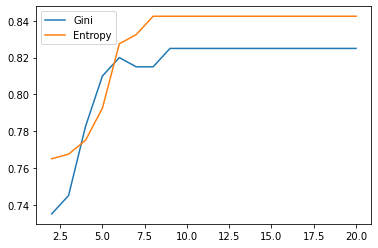

In [ ]:
depths = np.arange(20, 1, -1)
# print(calc_tree_results(data_test, depths, data_limit, 'Gini'))
a, b = show_difference(data_test, 'Gini', 'Entropy', depths, data_limit, 1)

In [ ]:
a.reverse()
b.reverse()
print(a, b)

[0.735, 0.745, 0.7825, 0.81, 0.82, 0.815, 0.815, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825] [0.765, 0.7675, 0.775, 0.7925, 0.8275, 0.8325, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425]


In [ ]:
max_a = np.argmax(a)+2
max_b = np.argmax(b)+2
print(max_a, a[max_a-2])
print(max_b, b[max_b-2])

9 0.825
8 0.8425


In [ ]:
print(a, b)

[0.735, 0.745, 0.7825, 0.81, 0.82, 0.815, 0.815, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825] [0.765, 0.7675, 0.775, 0.7925, 0.8275, 0.8325, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425, 0.8425]


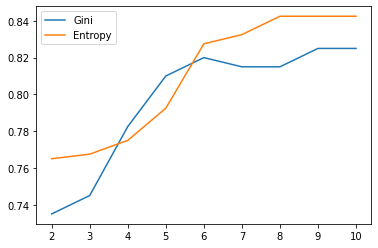

In [ ]:
depths = np.arange(2, 11, 1)
plt.plot(depths, a[:len(depths)])
plt.plot(depths, b[:len(depths)])
plt.legend(labels=['Gini', 'Entropy'])
plt.show()
# a, b = show_difference(data_test, 'Gini', 'Entropy', depths, data_limit, 2)

### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
for method in ['identity', 'logistic', 'tanh', 'relu']:
  for solver in ['lbfgs', 'sgd', 'adam']:
    mlp = MLPClassifier(random_state=1, max_iter=1000)
    mlp.activation = method
    mlp.solver = solver
    corr_mlp = mlp.fit(data_training[:, :-1], data_training[:, -1]).predict(data_test[:,:-1])
    corr_perc_mlp = 0
    for i in range(len(data_test)):
      if data_test[i, -1] == corr_mlp[i]:
        corr_perc_mlp += 1
    corr_perc_mlp = corr_perc_mlp/len(data_test)
    print(f'Correctly classified with {method} method and {solver} solver: {corr_perc_mlp*100} %')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Correctly classified with identity method and lbfgs solver: 32.75 %
Correctly classified with identity method and sgd solver: 23.75 %
Correctly classified with identity method and adam solver: 63.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Correctly classified with logistic method and lbfgs solver: 65.5 %
Correctly classified with logistic method and sgd solver: 56.49999999999999 %
Correctly classified with logistic method and adam solver: 74.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Correctly classified with tanh method and lbfgs solver: 65.25 %
Correctly classified with tanh method and sgd solver: 49.75 %
Correctly classified with tanh method and adam solver: 63.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Correctly classified with relu method and lbfgs solver: 70.75 %
Correctly classified with relu method and sgd solver: 25.5 %
Correctly classified with relu method and adam solver: 65.25 %


# Comparing self-planted and 'bought' trees

In [ ]:
from sklearn import tree

In [ ]:
for criterion in ['gini', 'entropy', 'log_loss']:
  clt = tree.DecisionTreeClassifier()
  corr_mlt = clt.fit(data_training[:, :-1], data_training[:, -1]).predict(data_test[:,:-1])
  corr_perc_mlt = 0
  for i in range(len(data_test)):
    if data_test[i, -1] == corr_mlt[i]:
      corr_perc_mlt += 1
  corr_perc_mlt = corr_perc_mlt/len(data_test)
  print(f'Correctly classified with {criterion} criterion: {corr_perc_mlt*100} %')

Correctly classified with gini criterion: 81.5 %
Correctly classified with entropy criterion: 82.0 %
Correctly classified with log_loss criterion: 81.75 %


### How about forests?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max = 0
max_depth_of_forest = 2
for i in range(2, 20, 1):
  rfc = RandomForestClassifier(max_depth=i, random_state=0)
  corr_rtc = rfc.fit(data_training[:, :-1], data_training[:, -1]).predict(data_test[:,:-1])
  corr_perc_rtc = 0
  for i in range(len(data_test)):
    if data_test[i, -1] == corr_rtc[i]:
      corr_perc_rtc += 1
  corr_perc_rtc = corr_perc_rtc/len(data_test)
  if corr_perc_rtc > max:
    max = corr_perc_rtc
    max_depth_of_forest = i
print(f'Correctly classified with forest: {max*100} %')

Correctly classified with forest: 88.0 %


# Results

Taking into account the results, seen as percent of correctly classified data from test dataset, we can see that hand-made tree did very well with it's 84.25% result, which has not been beaten with tested settings by any tree from sklearn library.
Neural networks did best with logistic method and adam solver - 74.0 % correct clasification.
The best model has proven to be random forest, which resulted in 88.0% od dataset being correctly classified.
Score is to meant to be $R^2$ determination coefficient. I don't know how it can be negative. Don't ask me about that. Sklearn is probably smart.
